# Dumbell Charts
## When to use a dumbell chart

 * To show the difference between two groups across one variable.

## Style tips



In [2]:
#This line of code installs the pacman page if you do not have it installed - if you do, it simply loads the package
if(!require(pacman))install.packages("pacman")
devtools::install_github("bbc/bbplot")
pacman::p_load('dplyr', 'tidyr', 'gapminder',
               'ggplot2',  'ggalt',
               'forcats', 'R.utils', 'png', 
               'grid', 'ggpubr', 'scales',
               'bbplot')

Skipping install of 'bbplot' from a github remote, the SHA1 (82af5952) has not changed since last install.
  Use `force = TRUE` to force installation

Warning message in utils::install.packages(package, ...):
“installation of package ‘ggpubr’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


ggpubr installed

Warning message:
“package ‘ggpubr’ was built under R version 4.0.3”
Warning message in pacman::p_load("dplyr", "tidyr", "gapminder", "ggplot2", "ggalt", :
“Failed to install/load:
ggpubr”


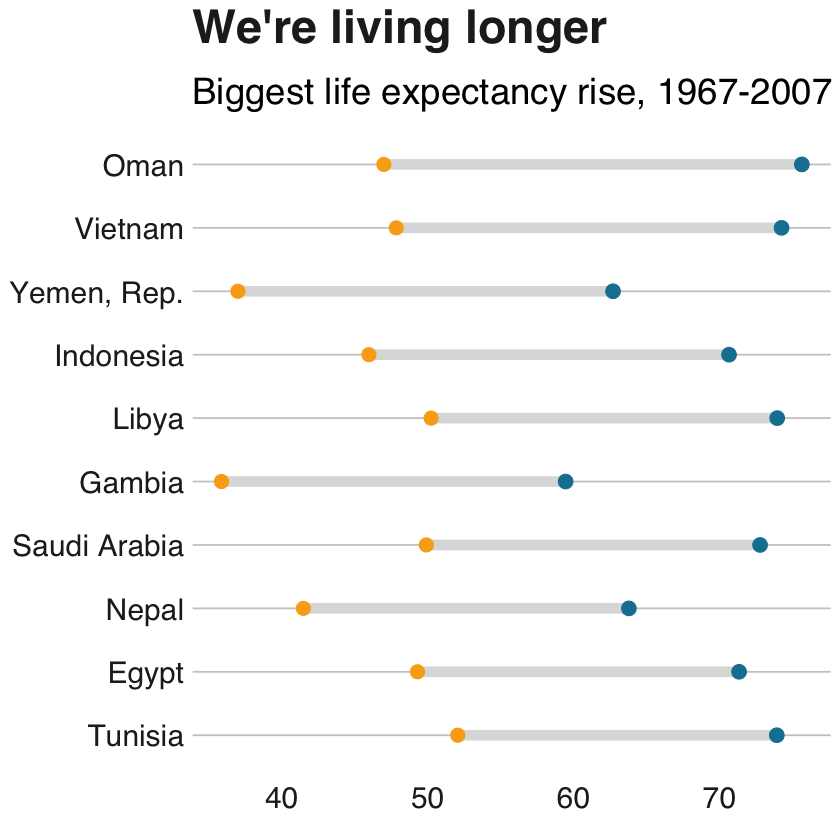

In [3]:
library("ggalt")
library("tidyr")

#Prepare data
dumbbell_df <- gapminder %>%
  filter(year == 1967 | year == 2007) %>%
  select(country, year, lifeExp) %>%
  spread(year, lifeExp) %>%
  mutate(gap = `2007` - `1967`) %>%
  arrange(desc(gap)) %>%
  head(10)

#Make plot
ggplot(dumbbell_df, aes(x = `1967`, xend = `2007`, y = reorder(country, gap), group = country)) + 
  geom_dumbbell(colour = "#dddddd",
                size = 3,
                colour_x = "#FAAB18",
                colour_xend = "#1380A1") +
  bbc_style() + 
  labs(title="We're living longer",
       subtitle="Biggest life expectancy rise, 1967-2007")